In [277]:
import pandas as pd 
import numpy as np
from tqdm import tqdm
import datetime
from matplotlib import pyplot as plt
from pandas import DataFrame
import seaborn as sns
import os
import sys
%matplotlib inline

In [87]:
import matplotlib.font_manager as fm
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumBarunGothic', 'C:\\Windows\\Fonts\\NanumBarunGothicUltraLight.ttf'),
 ('NanumSquare', 'C:\\Windows\\Fonts\\NanumSquareR.ttf'),
 ('NanumSquareRound', 'C:\\Windows\\Fonts\\NanumSquareRoundEB.ttf'),
 ('NanumSquareRound', 'C:\\Windows\\Fonts\\NanumSquareRoundL.ttf'),
 ('Nanum Brush Script', 'C:\\Windows\\Fonts\\NanumBrush.ttf'),
 ('NanumBarunpen', 'C:\\Windows\\Fonts\\NanumBarunpenB.ttf'),
 ('NanumSquareRound', 'C:\\Windows\\Fonts\\NanumSquareRoundB.ttf'),
 ('NanumBarunGothic', 'C:\\Windows\\Fonts\\NanumBarunGothicBold.ttf'),
 ('NanumMyeongjo', 'C:\\Windows\\Fonts\\NanumMyeongjoExtraBold.ttf'),
 ('Nanum Pen Script', 'C:\\Windows\\Fonts\\NanumPen.ttf'),
 ('NanumSquare', 'C:\\Windows\\Fonts\\NanumSquareL.ttf'),
 ('NanumMyeongjo', 'C:\\Windows\\Fonts\\NanumMyeongjoBold.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicBold.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothic.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicLight.ttf'),
 ('NanumGothic', 'C:\\Windows\\F

In [2]:
plt.rcParams["font.family"] = 'NanumBarunGothic'

# 데이터 읽기

In [17]:
print (os.getcwd())

D:\jupyter\project\mine


In [117]:
txi = pd.read_csv("data/call_taxi_final.csv", encoding= 'euc-kr')

In [39]:
dis = pd.read_csv("data/dis_pop.csv",encoding = 'euc-kr')

In [40]:
txi.head(10)

,차량고유번호,차량타입,예정일시,배차일시,승차일시,출발지(구),출발지(동),목적지(구),목적지(동)
0,9568,중형승합,2018-01-01 00:03:00,2018-01-01 02:19:23,2018-01-01 02:48:48,중구,명동,용산구,한강로동
1,7638,중형승합,2018-01-01 00:04:00,2018-01-01 02:24:19,2018-01-01 02:46:04,서초구,반포1동,강서구,등촌제3동
2,5807,중형승합,2018-01-01 00:08:00,2018-01-01 02:27:53,2018-01-01 02:48:29,강북구,인수동,노원구,하계2동
3,1061,중형승합,2018-01-01 00:21:00,2018-01-01 03:48:11,2018-01-01 03:59:29,관악구,청림동,성북구,안암동
4,7658,중형승합,2018-01-01 00:25:00,2018-01-01 03:55:17,2018-01-01 04:17:58,노원구,월계1동,노원구,상계5동
5,9568,중형승합,2018-01-01 00:26:00,2018-01-01 03:10:37,2018-01-01 03:29:05,용산구,청파동,금천구,시흥제1동
6,9568,중형승합,2018-01-01 00:26:00,2018-01-01 04:11:45,2018-01-01 04:26:14,구로구,구로제3동,관악구,성현동
7,1061,중형승합,2018-01-01 00:27:00,2018-01-01 02:42:20,2018-01-01 03:15:58,강서구,방화제1동,동작구,노량진제1동
8,7658,중형승합,2018-01-01 00:31:00,2018-01-01 02:47:07,2018-01-01 03:01:41,영등포구,여의동,강북구,우이동
9,7650,중형승합,2018-01-01 00:34:00,2018-01-01 04:03:50,2018-01-01 04:17:26,송파구,잠실7동,관악구,행운동


In [204]:
dis.head()

,기준년도,구,동,합계
0,2018,종로구,소계,"6,017"
1,2018,종로구,사직동,309
2,2018,종로구,삼청동,118
3,2018,종로구,부암동,325
4,2018,종로구,평창동,542


In [118]:
start = pd.DataFrame(txi.groupby('출발지(구)')['출발지(동)'].count().sort_values(ascending=False))

In [119]:
start_dong = pd.DataFrame(txi.groupby( '출발지(동)')['승차일시'].count().sort_values(ascending=False))

In [120]:
start_dong.head()

,승차일시
출발지(동),
하계1동,26059
상계6.7동,21498
신촌동,20530
성산제2동,19522
역촌동,17093


Text(0, 0.5, '횟수')

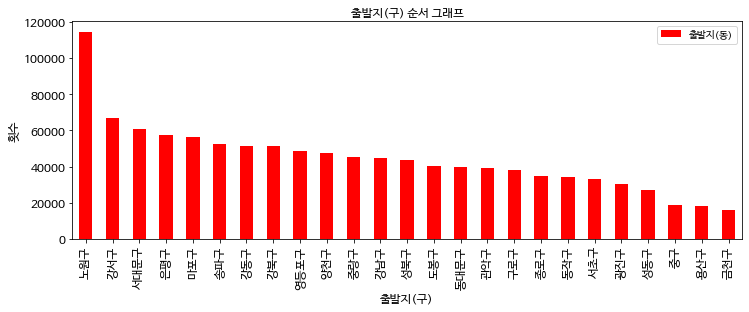

In [121]:
sta_ax = start.plot(kind='bar', title='출발지(구) 순서 그래프', figsize=(12, 4), legend=True, fontsize=12, color='red')
sta_ax.set_xlabel('출발지(구)', fontsize=12)
sta_ax.set_ylabel('횟수', fontsize=12)

Text(0, 0.5, '횟수')

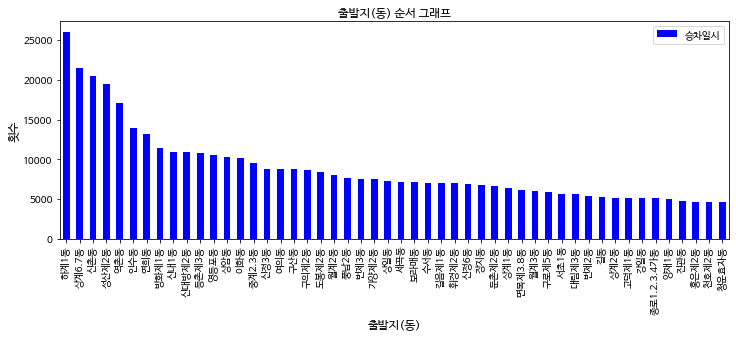

In [122]:
sta_ax1 = start_dong.head(50).plot(kind='bar', title='출발지(동) 순서 그래프', figsize=(12, 4), legend=True, fontsize=10, color='blue')
sta_ax1.set_xlabel('출발지(동)', fontsize=12)
sta_ax1.set_ylabel('횟수', fontsize=12)

In [123]:
arrive =  pd.DataFrame(txi.groupby('목적지(구)')['목적지(동)'].count().sort_values(ascending=False))

Text(0, 0.5, '도착지(동)')

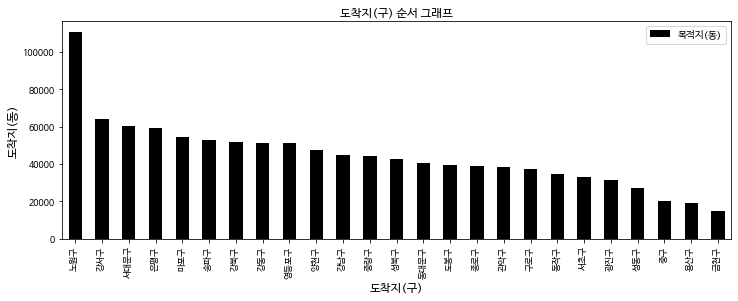

In [126]:
ari_ax = arrive.plot(kind='bar', title='도착지(구) 순서 그래프', figsize=(12, 4), legend=True, fontsize=9, color='black')
ari_ax.set_xlabel('도착지(구)', fontsize=12)
ari_ax.set_ylabel('도착지(동)', fontsize=12)

In [127]:
arrive_dong =  pd.DataFrame(txi.groupby('목적지(동)')['승차일시'].count().sort_values(ascending=False))

Text(0, 0.5, '도착지(동)')

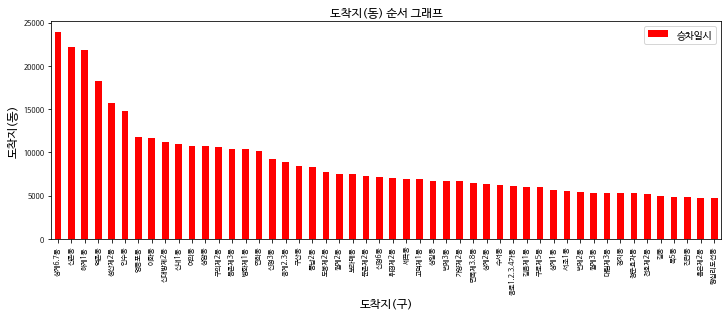

In [128]:
ari_ax = arrive_dong.head(50).plot(kind='bar', title='도착지(동) 순서 그래프', figsize=(12, 4), legend=True, fontsize=7, color='red')
ari_ax.set_xlabel('도착지(구)', fontsize=12)
ari_ax.set_ylabel('도착지(동)', fontsize=12)

In [129]:
txi2 = txi.copy()

In [263]:
txi2.head()

,차량고유번호,차량타입,예정일시,배차일시,승차일시,출발지(구),출발지(동),목적지(구),목적지(동),승차_예정(초),승차_배차(초),배차_예정(초),월,일,요일,시간
0,9568,중형승합,2018-01-01 00:03:00,2018-01-01 02:19:23,2018-01-01 02:48:48,중구,명동,용산구,한강로동,9948,1765,1765,1,1,Monday,2
1,7638,중형승합,2018-01-01 00:04:00,2018-01-01 02:24:19,2018-01-01 02:46:04,서초구,반포1동,강서구,등촌제3동,9724,1305,1305,1,1,Monday,2
2,5807,중형승합,2018-01-01 00:08:00,2018-01-01 02:27:53,2018-01-01 02:48:29,강북구,인수동,노원구,하계2동,9629,1236,1236,1,1,Monday,2
3,1061,중형승합,2018-01-01 00:21:00,2018-01-01 03:48:11,2018-01-01 03:59:29,관악구,청림동,성북구,안암동,13109,678,678,1,1,Monday,3
4,7658,중형승합,2018-01-01 00:25:00,2018-01-01 03:55:17,2018-01-01 04:17:58,노원구,월계1동,노원구,상계5동,13978,1361,1361,1,1,Monday,4


In [262]:
txi2.corr()

,차량고유번호,승차_예정(초),승차_배차(초),배차_예정(초),월,일,시간
차량고유번호,1.000000,0.007450,-0.000354,-0.000354,0.057598,0.003502,0.003721
승차_예정(초),0.007450,1.000000,0.562246,0.562246,0.066402,0.002110,-0.516026
승차_배차(초),-0.000354,0.562246,1.000000,1.000000,-0.011128,-0.003395,-0.337559
배차_예정(초),-0.000354,0.562246,1.000000,1.000000,-0.011128,-0.003395,-0.337559
월,0.057598,0.066402,-0.011128,-0.011128,1.000000,-0.007527,0.017195
일,0.003502,0.002110,-0.003395,-0.003395,-0.007527,1.000000,0.001989
시간,0.003721,-0.516026,-0.337559,-0.337559,0.017195,0.001989,1.000000


In [164]:
mon_dep_gu = pd.DataFrame(txi.groupby('월')['목적지(구)'].count().sort_index(ascending=True))

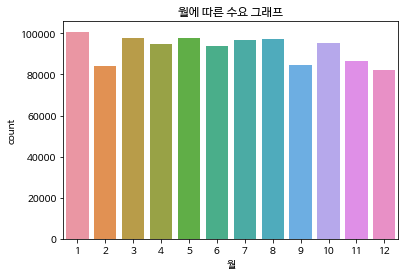

In [160]:
sns.countplot(x="월", data=txi2)
plt.title("월에 따른 수요 그래프")
plt.show()

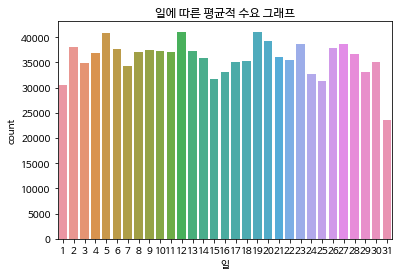

In [239]:
sns.countplot(x="일", data=txi2)
plt.title("일에 따른 평균적 수요 그래프")
plt.show()

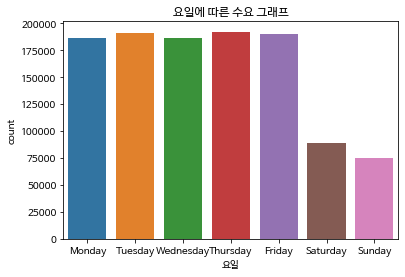

In [238]:
sns.countplot(x="요일", data=txi2)
plt.title("요일에 따른 수요 그래프")
plt.show()

# 월단위 일별 변화

In [212]:
mon_day_dep_gu = pd.DataFrame(txi.groupby(['월', '일', '요일'])['목적지(구)'].count().sort_index(ascending=True))

In [219]:
mon_day_dep_gu.head()

목적지(구)
월 일 요일               
1 1 Monday        946
    Tuesday       322
  2 Tuesday      3561
  3 Wednesday    3869
  4 Thursday     3964

In [216]:
mon_day_dep_gu_1 = mon_day_dep_gu.loc[1]
mon_day_dep_gu_2 = mon_day_dep_gu.loc[2]
mon_day_dep_gu_3 = mon_day_dep_gu.loc[3]
mon_day_dep_gu_4 = mon_day_dep_gu.loc[4]
mon_day_dep_gu_5 = mon_day_dep_gu.loc[5]
mon_day_dep_gu_6 = mon_day_dep_gu.loc[6]
mon_day_dep_gu_7 = mon_day_dep_gu.loc[7]
mon_day_dep_gu_8 = mon_day_dep_gu.loc[8]
mon_day_dep_gu_9 = mon_day_dep_gu.loc[9]
mon_day_dep_gu_10 = mon_day_dep_gu.loc[10]
mon_day_dep_gu_11 = mon_day_dep_gu.loc[11]
mon_day_dep_gu_12 = mon_day_dep_gu.loc[12]

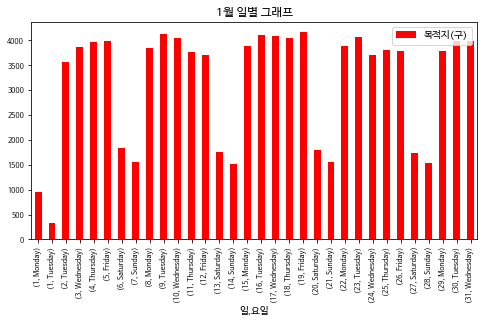

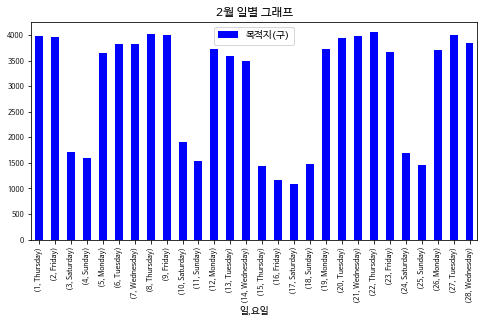

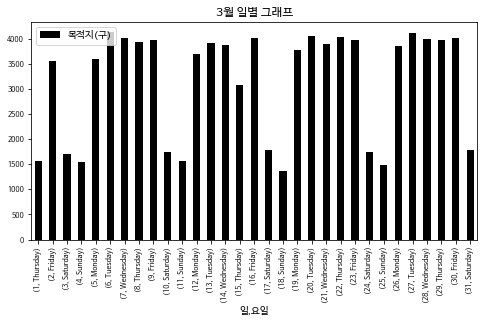

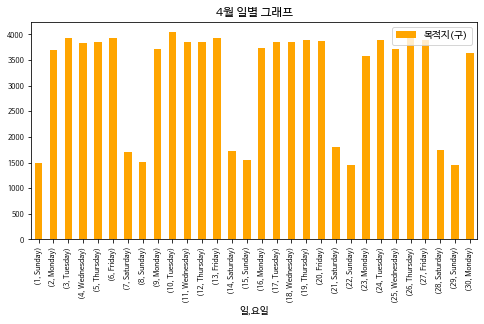

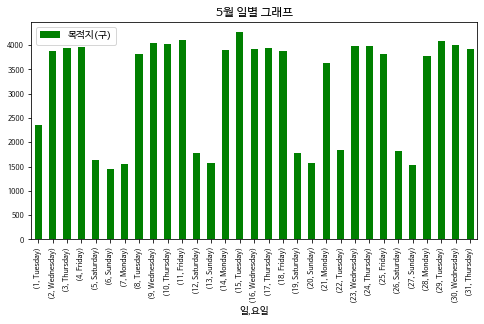

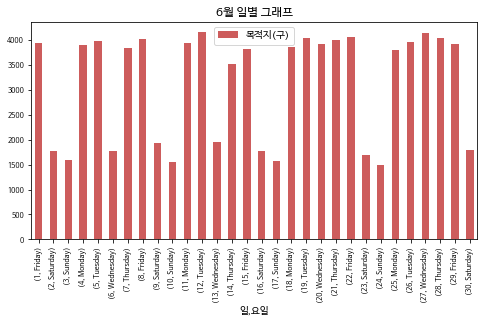

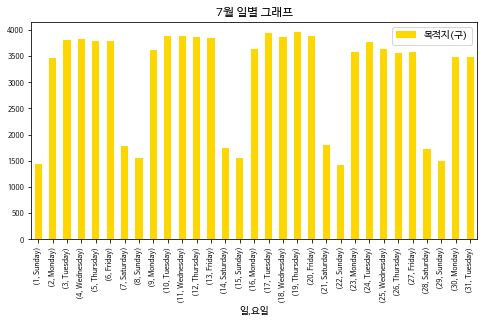

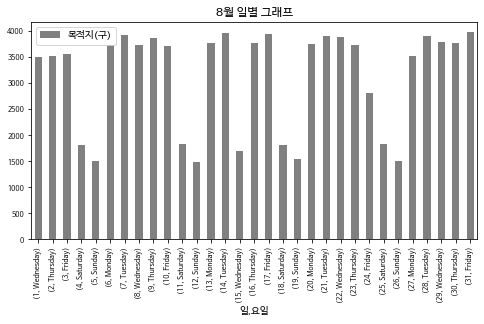

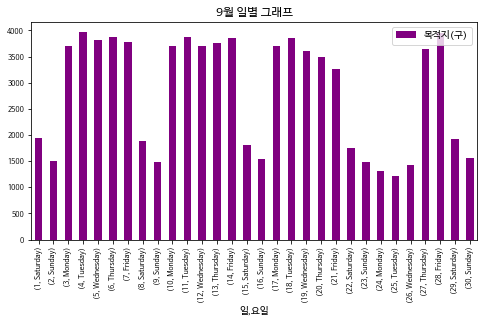

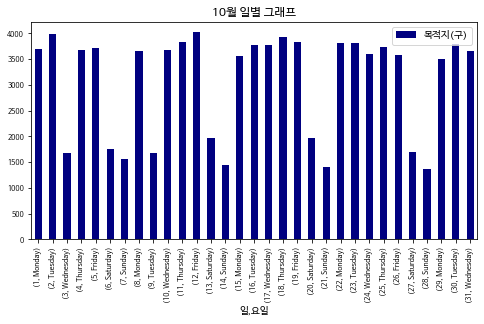

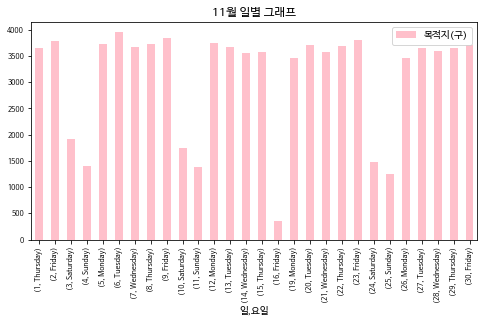

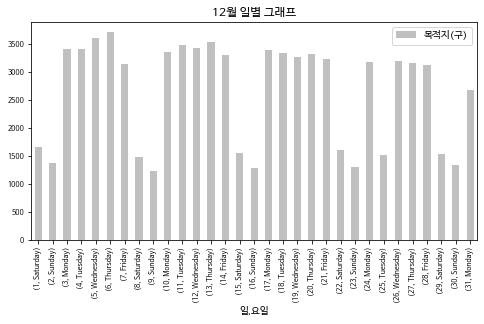

In [217]:
mon_day_dep_gu_1.plot(kind='bar', title='1월 일별 그래프', figsize=(8, 4), legend=True, fontsize=7, color='red')
mon_day_dep_gu_2.plot(kind='bar', title='2월 일별 그래프', figsize=(8, 4), legend=True, fontsize=7, color='blue')
mon_day_dep_gu_3.plot(kind='bar', title='3월 일별 그래프', figsize=(8, 4), legend=True, fontsize=7, color='black')
mon_day_dep_gu_4.plot(kind='bar', title='4월 일별 그래프', figsize=(8, 4), legend=True, fontsize=7, color='orange')
mon_day_dep_gu_5.plot(kind='bar', title='5월 일별 그래프', figsize=(8, 4), legend=True, fontsize=7, color='green')
mon_day_dep_gu_6.plot(kind='bar', title='6월 일별 그래프', figsize=(8, 4), legend=True, fontsize=7, color='indianred')
mon_day_dep_gu_7.plot(kind='bar', title='7월 일별 그래프', figsize=(8, 4), legend=True, fontsize=7, color='gold')
mon_day_dep_gu_8.plot(kind='bar', title='8월 일별 그래프', figsize=(8, 4), legend=True, fontsize=7, color='gray')
mon_day_dep_gu_9.plot(kind='bar', title='9월 일별 그래프', figsize=(8, 4), legend=True, fontsize=7, color='purple')
mon_day_dep_gu_10.plot(kind='bar', title='10월 일별 그래프', figsize=(8, 4), legend=True, fontsize=7, color='navy')
mon_day_dep_gu_11.plot(kind='bar', title='11월 일별 그래프', figsize=(8, 4), legend=True, fontsize=7, color='pink')
mon_day_dep_gu_12.plot(kind='bar', title='12월 일별 그래프', figsize=(8, 4), legend=True, fontsize=7, color='silver')
plt.show()

# 3개월씩 나눠서 본 일별 변화

In [242]:
mon_day_str_gu = pd.DataFrame(txi.groupby(['월','일']).count().sort_index(ascending=True))

In [250]:
mon_day_gu = pd.DataFrame(txi.groupby(['월', '일'])['목적지(구)'].count().sort_index(ascending=True))

In [258]:
mon_day_gu_1_3 = mon_day_gu.loc[1:3]
mon_day_gu_4_6 = mon_day_gu.loc[4:6]
mon_day_gu_7_9 = mon_day_gu.loc[7:9]
mon_day_gu_10_12 = mon_day_gu.loc[10:12]

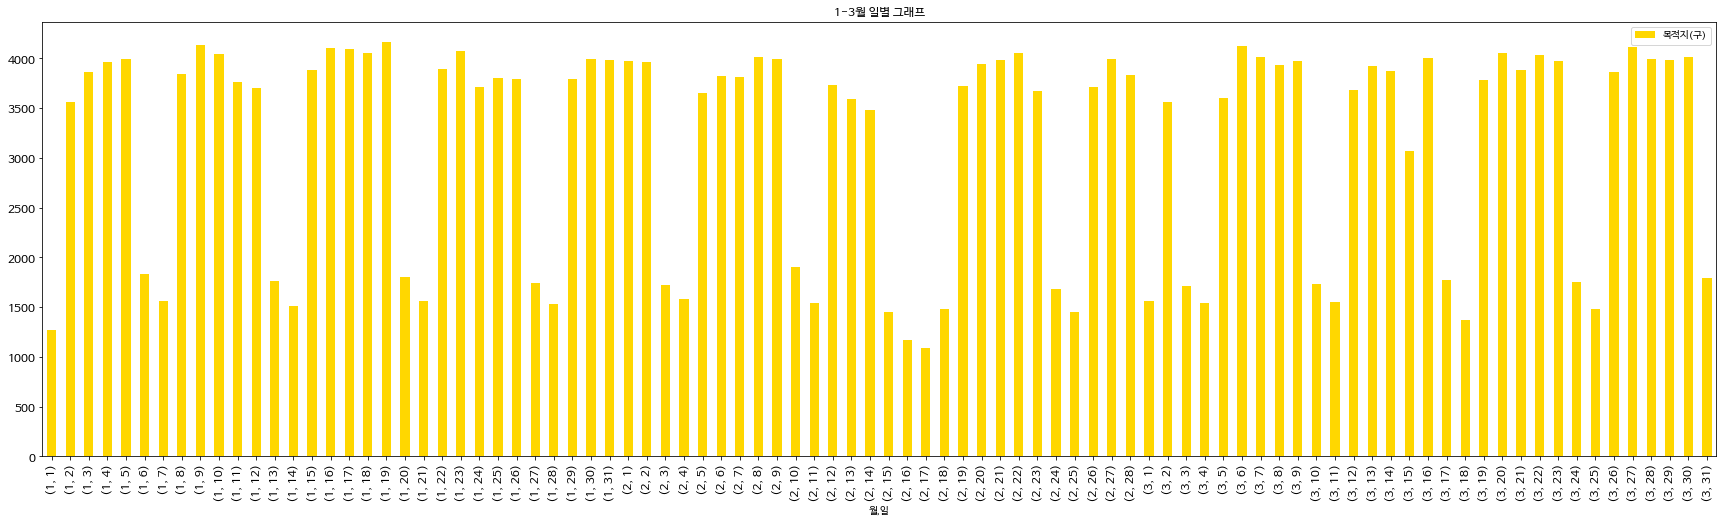

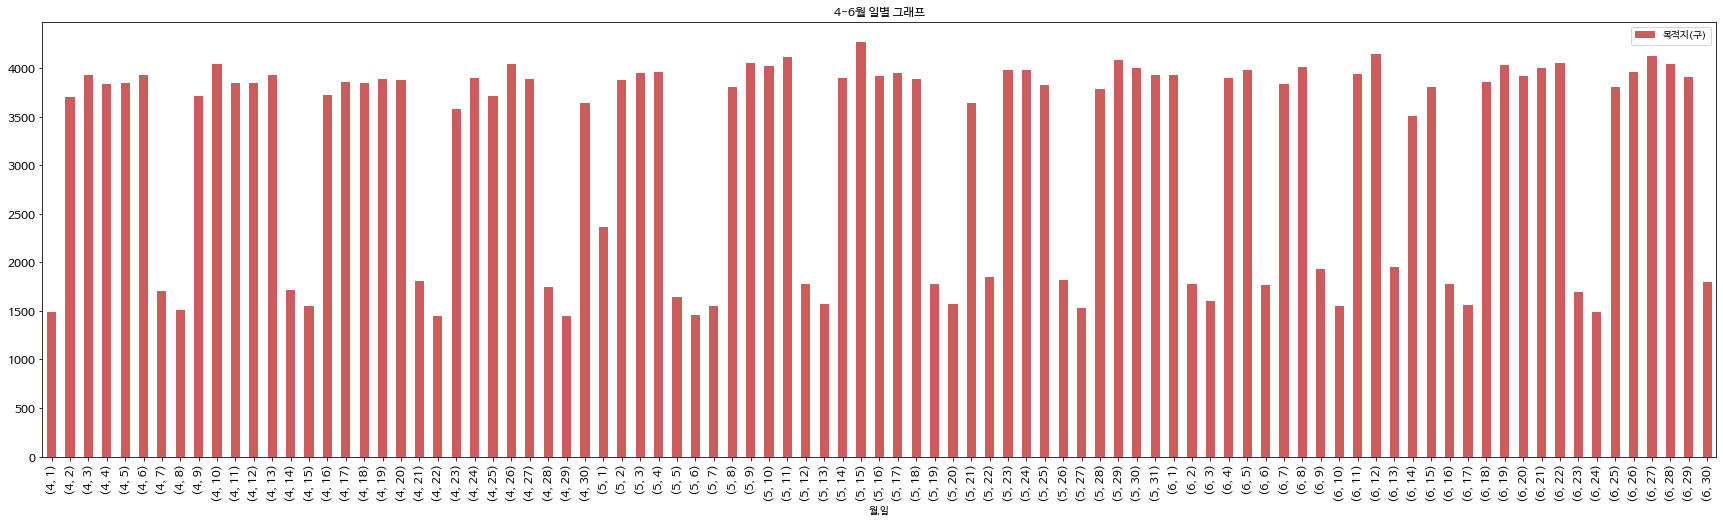

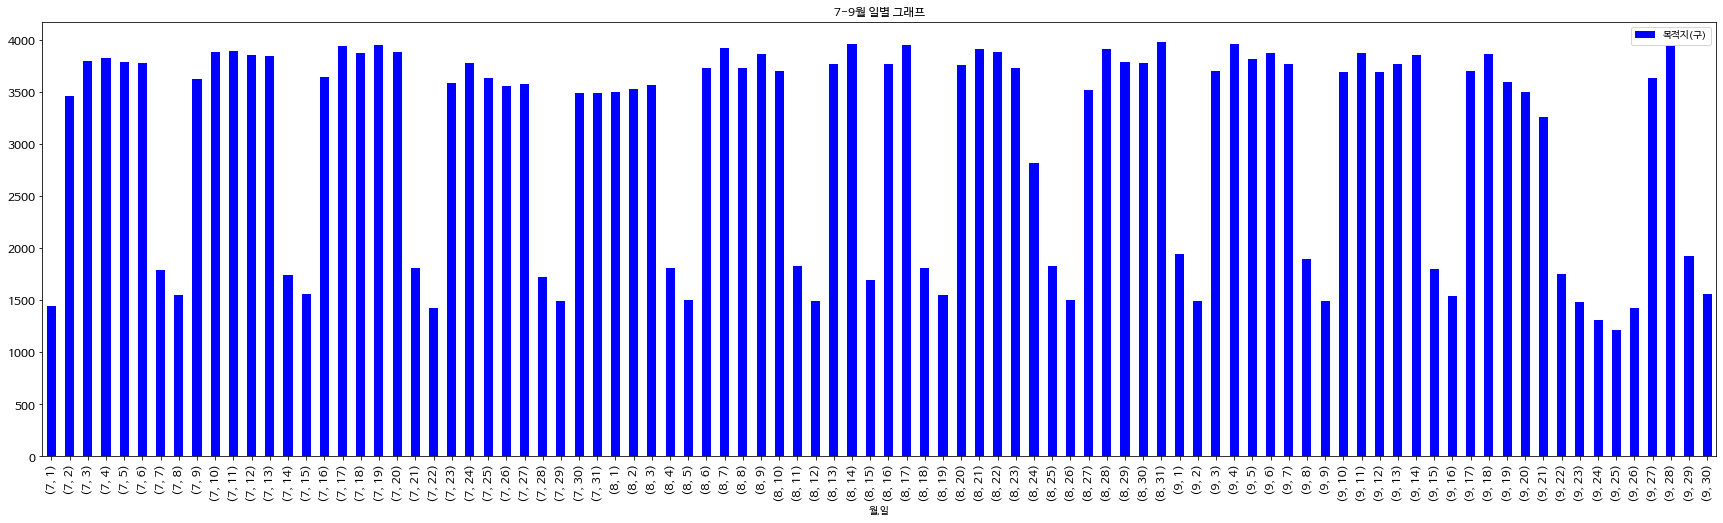

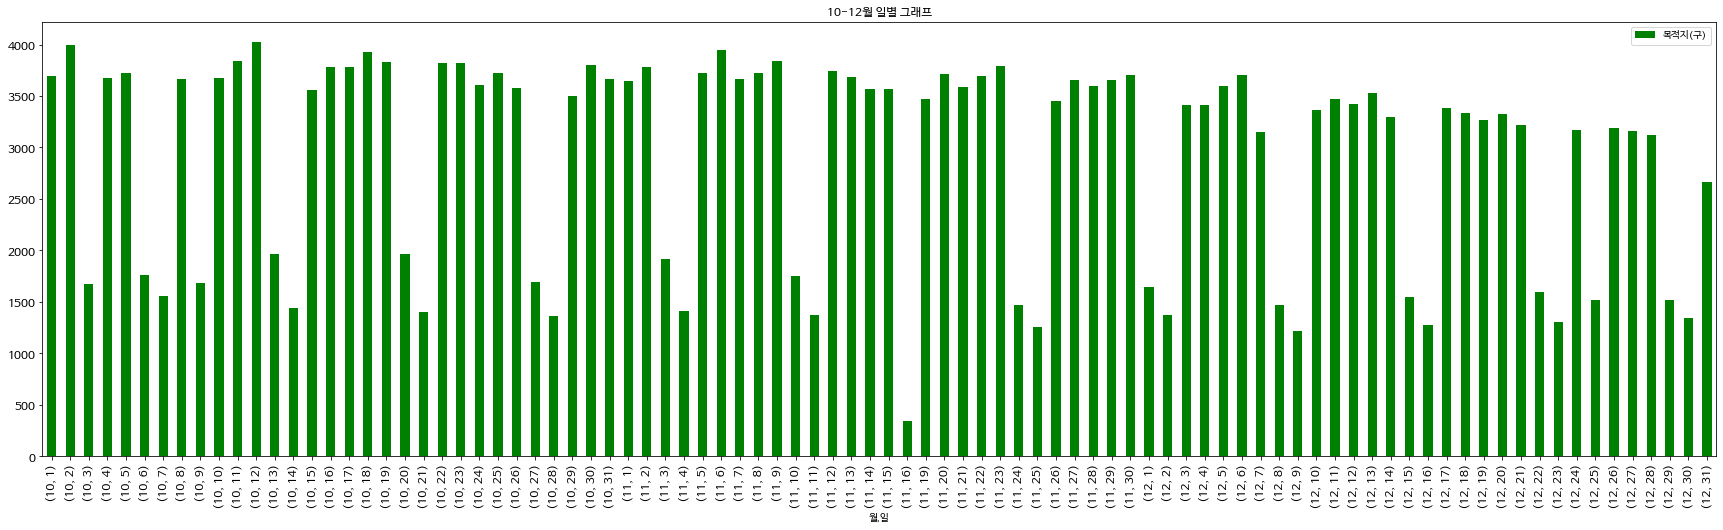

In [261]:
mon_day_gu_1_3.plot(kind='bar', title='1-3월 일별 그래프', figsize=(30, 8), legend=True, fontsize=12, color='gold')
mon_day_gu_4_6.plot(kind='bar', title='4-6월 일별 그래프', figsize=(30, 8), legend=True, fontsize=12, color='indianred')
mon_day_gu_7_9.plot(kind='bar', title='7-9월 일별 그래프', figsize=(30, 8), legend=True, fontsize=12, color='blue')
mon_day_gu_10_12.plot(kind='bar', title='10-12월 일별 그래프', figsize=(30, 8), legend=True, fontsize=12, color='green')

# 출발지에 따른 웨이팅(구)

In [339]:
wait_str = pd.DataFrame(txi2.groupby('출발지(구)')['승차_예정(초)'].mean().sort_values(ascending=False))

In [340]:
wait_str.head()

,승차_예정(초)
출발지(구),
관악구,7462.555504
중랑구,6791.307570
금천구,6722.887998
성동구,6584.456241
양천구,6380.140412


In [341]:
wait_str["승차_예정(시간)"] = str(datetime.timedelta(seconds=int(wait_str["승차_예정(초)"][1])))

In [342]:
for i in range(len(wait_str)):
    wait_str["승차_예정(시간)"][i] =  str(datetime.timedelta(seconds=int(wait_str["승차_예정(초)"][i])))

C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [386]:
wait_str.head(10)

,승차_예정(시간)
출발지(구),
관악구,2:04:22
중랑구,1:53:11
금천구,1:52:02
성동구,1:49:44
양천구,1:46:20
동대문구,1:46:15
동작구,1:45:21
구로구,1:44:47
중구,1:44:24


In [344]:
del wait_str["승차_예정(초)"]

# 출발지에 따른 웨이팅(동)

In [361]:
wait_str_dong = pd.DataFrame(txi2.groupby(['출발지(구)', '출발지(동)'])['승차_예정(초)'].mean().sort_values(ascending=False))

In [363]:
wait_str_dong.head()

,,승차_예정(초)
출발지(구),출발지(동),
중랑구,면목제3.8동,12645.303612
관악구,청림동,12517.081489
성동구,행당제2동,12506.282842
관악구,중앙동,11268.121739
강남구,논현2동,11094.523677


In [364]:
wait_str_dong["승차_예정(시간)"] = str(datetime.timedelta(seconds=int(wait_str_dong["승차_예정(초)"][1])))

In [365]:
for i in tqdm(range(len(wait_str_dong))):
    wait_str_dong["승차_예정(시간)"][i] =  str(datetime.timedelta(seconds=int(wait_str_dong["승차_예정(초)"][i])))





  0%|                                                  | 0/434 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  




  0%|                                          | 1/434 [00:00<03:26,  2.10it/s]



  0%|▏                                         | 2/434 [00:00<03:21,  2.14it/s]



  1%|▎                                         | 3/434 [00:01<03:20,  2.15it/s]



  1%|▍                                         | 4/434 [00:01<03:26,  2.08it/s]



  1%|▍                                         | 5/434 [00:02<03:20,  2.14it/s]



  1%|▌                                         | 6/434 [00:02<03:16,  2.18it/s]



  2%|▋                                         | 7/434 [00:03<03:15,  2.19it/s]



  2%|▊                               

 22%|████████▉                                | 95/434 [00:42<02:29,  2.27it/s]



 22%|█████████                                | 96/434 [00:42<02:28,  2.28it/s]



 22%|█████████▏                               | 97/434 [00:43<02:29,  2.25it/s]



 23%|█████████▎                               | 98/434 [00:43<02:29,  2.25it/s]



 23%|█████████▎                               | 99/434 [00:43<02:28,  2.25it/s]



 23%|█████████▏                              | 100/434 [00:44<02:27,  2.26it/s]



 23%|█████████▎                              | 101/434 [00:44<02:27,  2.26it/s]



 24%|█████████▍                              | 102/434 [00:45<02:26,  2.26it/s]



 24%|█████████▍                              | 103/434 [00:45<02:26,  2.26it/s]



 24%|█████████▌                              | 104/434 [00:46<02:25,  2.27it/s]



 24%|█████████▋                              | 105/434 [00:46<02:24,  2.28it/s]



 24%|█████████▊                              | 106/434 [00:46<02:24,  2.27it/s]



 25%

 44%|█████████████████▊                      | 193/434 [01:25<01:46,  2.26it/s]



 45%|█████████████████▉                      | 194/434 [01:25<01:46,  2.26it/s]



 45%|█████████████████▉                      | 195/434 [01:26<01:44,  2.28it/s]



 45%|██████████████████                      | 196/434 [01:26<01:44,  2.28it/s]



 45%|██████████████████▏                     | 197/434 [01:27<01:44,  2.27it/s]



 46%|██████████████████▏                     | 198/434 [01:27<01:44,  2.26it/s]



 46%|██████████████████▎                     | 199/434 [01:28<01:43,  2.26it/s]



 46%|██████████████████▍                     | 200/434 [01:28<01:42,  2.28it/s]



 46%|██████████████████▌                     | 201/434 [01:28<01:42,  2.27it/s]



 47%|██████████████████▌                     | 202/434 [01:29<01:42,  2.27it/s]



 47%|██████████████████▋                     | 203/434 [01:29<01:42,  2.26it/s]



 47%|██████████████████▊                     | 204/434 [01:30<01:41,  2.27it/s]



 47%

 67%|██████████████████████████▊             | 291/434 [02:08<01:03,  2.27it/s]



 67%|██████████████████████████▉             | 292/434 [02:09<01:02,  2.27it/s]



 68%|███████████████████████████             | 293/434 [02:09<01:02,  2.26it/s]



 68%|███████████████████████████             | 294/434 [02:09<01:02,  2.25it/s]



 68%|███████████████████████████▏            | 295/434 [02:10<01:01,  2.27it/s]



 68%|███████████████████████████▎            | 296/434 [02:10<01:00,  2.27it/s]



 68%|███████████████████████████▎            | 297/434 [02:11<01:00,  2.27it/s]



 69%|███████████████████████████▍            | 298/434 [02:11<01:00,  2.26it/s]



 69%|███████████████████████████▌            | 299/434 [02:12<00:59,  2.27it/s]



 69%|███████████████████████████▋            | 300/434 [02:12<00:59,  2.27it/s]



 69%|███████████████████████████▋            | 301/434 [02:13<00:58,  2.26it/s]



 70%|███████████████████████████▊            | 302/434 [02:13<00:58,  2.26it/s]



 70%

 90%|███████████████████████████████████▊    | 389/434 [02:51<00:19,  2.27it/s]



 90%|███████████████████████████████████▉    | 390/434 [02:52<00:19,  2.28it/s]



 90%|████████████████████████████████████    | 391/434 [02:52<00:18,  2.27it/s]



 90%|████████████████████████████████████▏   | 392/434 [02:53<00:18,  2.27it/s]



 91%|████████████████████████████████████▏   | 393/434 [02:53<00:18,  2.27it/s]



 91%|████████████████████████████████████▎   | 394/434 [02:54<00:17,  2.26it/s]



 91%|████████████████████████████████████▍   | 395/434 [02:54<00:17,  2.28it/s]



 91%|████████████████████████████████████▍   | 396/434 [02:54<00:16,  2.28it/s]



 91%|████████████████████████████████████▌   | 397/434 [02:55<00:16,  2.26it/s]



 92%|████████████████████████████████████▋   | 398/434 [02:55<00:15,  2.26it/s]



 92%|████████████████████████████████████▊   | 399/434 [02:56<00:15,  2.28it/s]



 92%|████████████████████████████████████▊   | 400/434 [02:56<00:14,  2.27it/s]



 92%

In [368]:
wait_str_dong.head()

,,승차_예정(시간)
출발지(구),출발지(동),
중랑구,면목제3.8동,3:30:45
관악구,청림동,3:28:37
성동구,행당제2동,3:28:26
관악구,중앙동,3:07:48
강남구,논현2동,3:04:54


In [367]:
del wait_str_dong["승차_예정(초)"]

# 목적지에 따른 웨이팅

In [353]:
wait_dep = pd.DataFrame(txi2.groupby('목적지(구)')['승차_예정(초)'].mean().sort_values(ascending=False))

In [354]:
wait_dep["승차_예정(시간)"] = str(datetime.timedelta(seconds=int(wait_dep["승차_예정(초)"][1])))

In [355]:
import datetime
for i in range(len(wait_dep)):
    wait_dep["승차_예정(시간)"][i] =  str(datetime.timedelta(seconds=int(wait_dep["승차_예정(초)"][i])))

C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [359]:
wait_dep.head()

,승차_예정(시간)
목적지(구),
금천구,1:58:51
동작구,1:56:33
관악구,1:53:21
서초구,1:49:27
동대문구,1:47:37


In [357]:
del wait_dep["승차_예정(초)"]

# 목적지에 따른 웨이팅(동)

In [369]:
wait_dep_dong = pd.DataFrame(txi2.groupby(['목적지(구)', '목적지(동)'])['승차_예정(초)'].mean().sort_values(ascending=False))

In [370]:
wait_dep_dong["승차_예정(시간)"] = str(datetime.timedelta(seconds=int(wait_dep_dong["승차_예정(초)"][1])))

In [371]:
for i in tqdm(range(len(wait_dep_dong))):
    wait_dep_dong["승차_예정(시간)"][i] =  str(datetime.timedelta(seconds=int(wait_dep_dong["승차_예정(초)"][i])))





  0%|                                                  | 0/434 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  




  0%|                                          | 1/434 [00:00<03:19,  2.17it/s]



  0%|▏                                         | 2/434 [00:00<03:16,  2.20it/s]



  1%|▎                                         | 3/434 [00:01<03:16,  2.19it/s]



  1%|▍                                         | 4/434 [00:01<03:24,  2.11it/s]



  1%|▍                                         | 5/434 [00:02<03:19,  2.15it/s]



  1%|▌                                         | 6/434 [00:02<03:16,  2.17it/s]



  2%|▋                                         | 7/434 [00:03<03:14,  2.20it/s]



  2%|▊                               

 22%|████████▉                                | 95/434 [00:42<02:35,  2.18it/s]



 22%|█████████                                | 96/434 [00:42<02:33,  2.20it/s]



 22%|█████████▏                               | 97/434 [00:43<02:32,  2.20it/s]



 23%|█████████▎                               | 98/434 [00:43<02:32,  2.21it/s]



 23%|█████████▎                               | 99/434 [00:44<02:32,  2.20it/s]



 23%|█████████▏                              | 100/434 [00:44<02:31,  2.21it/s]



 23%|█████████▎                              | 101/434 [00:44<02:30,  2.21it/s]



 24%|█████████▍                              | 102/434 [00:45<02:29,  2.22it/s]



 24%|█████████▍                              | 103/434 [00:45<02:28,  2.23it/s]



 24%|█████████▌                              | 104/434 [00:46<02:26,  2.26it/s]



 24%|█████████▋                              | 105/434 [00:46<02:25,  2.26it/s]



 24%|█████████▊                              | 106/434 [00:47<02:24,  2.27it/s]



 25%

 44%|█████████████████▊                      | 193/434 [01:25<01:46,  2.26it/s]



 45%|█████████████████▉                      | 194/434 [01:25<01:46,  2.26it/s]



 45%|█████████████████▉                      | 195/434 [01:26<01:44,  2.29it/s]



 45%|██████████████████                      | 196/434 [01:26<01:44,  2.28it/s]



 45%|██████████████████▏                     | 197/434 [01:27<01:44,  2.27it/s]



 46%|██████████████████▏                     | 198/434 [01:27<01:44,  2.26it/s]



 46%|██████████████████▎                     | 199/434 [01:28<01:43,  2.27it/s]



 46%|██████████████████▍                     | 200/434 [01:28<01:42,  2.28it/s]



 46%|██████████████████▌                     | 201/434 [01:28<01:42,  2.28it/s]



 47%|██████████████████▌                     | 202/434 [01:29<01:42,  2.27it/s]



 47%|██████████████████▋                     | 203/434 [01:29<01:41,  2.27it/s]



 47%|██████████████████▊                     | 204/434 [01:30<01:40,  2.29it/s]



 47%

 67%|██████████████████████████▊             | 291/434 [02:08<01:02,  2.28it/s]



 67%|██████████████████████████▉             | 292/434 [02:08<01:02,  2.28it/s]



 68%|███████████████████████████             | 293/434 [02:09<01:02,  2.27it/s]



 68%|███████████████████████████             | 294/434 [02:09<01:01,  2.26it/s]



 68%|███████████████████████████▏            | 295/434 [02:10<01:00,  2.29it/s]



 68%|███████████████████████████▎            | 296/434 [02:10<01:00,  2.28it/s]



 68%|███████████████████████████▎            | 297/434 [02:11<01:00,  2.28it/s]



 69%|███████████████████████████▍            | 298/434 [02:11<00:59,  2.27it/s]



 69%|███████████████████████████▌            | 299/434 [02:12<00:59,  2.28it/s]



 69%|███████████████████████████▋            | 300/434 [02:12<00:58,  2.29it/s]



 69%|███████████████████████████▋            | 301/434 [02:12<00:58,  2.28it/s]



 70%|███████████████████████████▊            | 302/434 [02:13<00:57,  2.28it/s]



 70%

 90%|███████████████████████████████████▊    | 389/434 [02:51<00:19,  2.26it/s]



 90%|███████████████████████████████████▉    | 390/434 [02:51<00:19,  2.23it/s]



 90%|████████████████████████████████████    | 391/434 [02:52<00:19,  2.17it/s]



 90%|████████████████████████████████████▏   | 392/434 [02:52<00:19,  2.17it/s]



 91%|████████████████████████████████████▏   | 393/434 [02:53<00:18,  2.20it/s]



 91%|████████████████████████████████████▎   | 394/434 [02:53<00:18,  2.21it/s]



 91%|████████████████████████████████████▍   | 395/434 [02:54<00:17,  2.24it/s]



 91%|████████████████████████████████████▍   | 396/434 [02:54<00:16,  2.25it/s]



 91%|████████████████████████████████████▌   | 397/434 [02:55<00:16,  2.23it/s]



 92%|████████████████████████████████████▋   | 398/434 [02:55<00:16,  2.23it/s]



 92%|████████████████████████████████████▊   | 399/434 [02:56<00:15,  2.25it/s]



 92%|████████████████████████████████████▊   | 400/434 [02:56<00:15,  2.26it/s]



 92%

In [375]:
wait_dep_dong.head(10)

승차_예정(시간)
목적지(구) 목적지(동)          
강남구    개포2동     3:44:56
용산구    이태원제2동   3:34:56
동대문구   답십리제1동   3:34:02
       신설동      3:27:11
구로구    구로제1동    3:25:36
송파구    송파1동     3:12:48
관악구    인헌동      3:01:28
금천구    시흥제5동    2:57:48
동작구    신대방제1동   2:52:54
관악구    은천동      2:43:31

In [373]:
del wait_dep_dong["승차_예정(초)"]